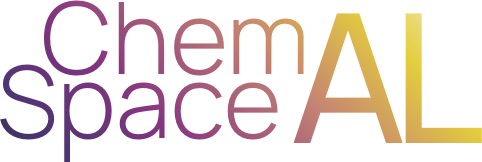

**ABSTRACT:**The incredible capabilities of generative artificial intelligence models have inevitably led to their application in the domain of drug discovery. It is therefore of tremendous interest to develop methodologies that enhance the abilities and applicability of these powerful tools. In this work, we present a novel and efficient semi-supervised active learning methodology that allows for the fine-tuning of a generative model with respect to an objective function by strategically operating within a constructed representation of the sample space. In the context of targeted molecular generation, we demonstrate the ability to fine-tune a GPT-based molecular generator with respect to an attractive interaction-based scoring function by strategically operating within a chemical space proxy, thereby maximizing attractive interactions between the generated molecules and a protein target. Importantly, our approach does not require the individual evaluation of all data points that are used for fine-tuning, enabling the incorporation of computationally expensive metrics. We are hopeful that the inherent generality of this methodology ensures that it will remain applicable as this exciting field evolves. To facilitate implementation and reproducibility, we have made all of our software available through the open-source ChemSpaceAL Python package.

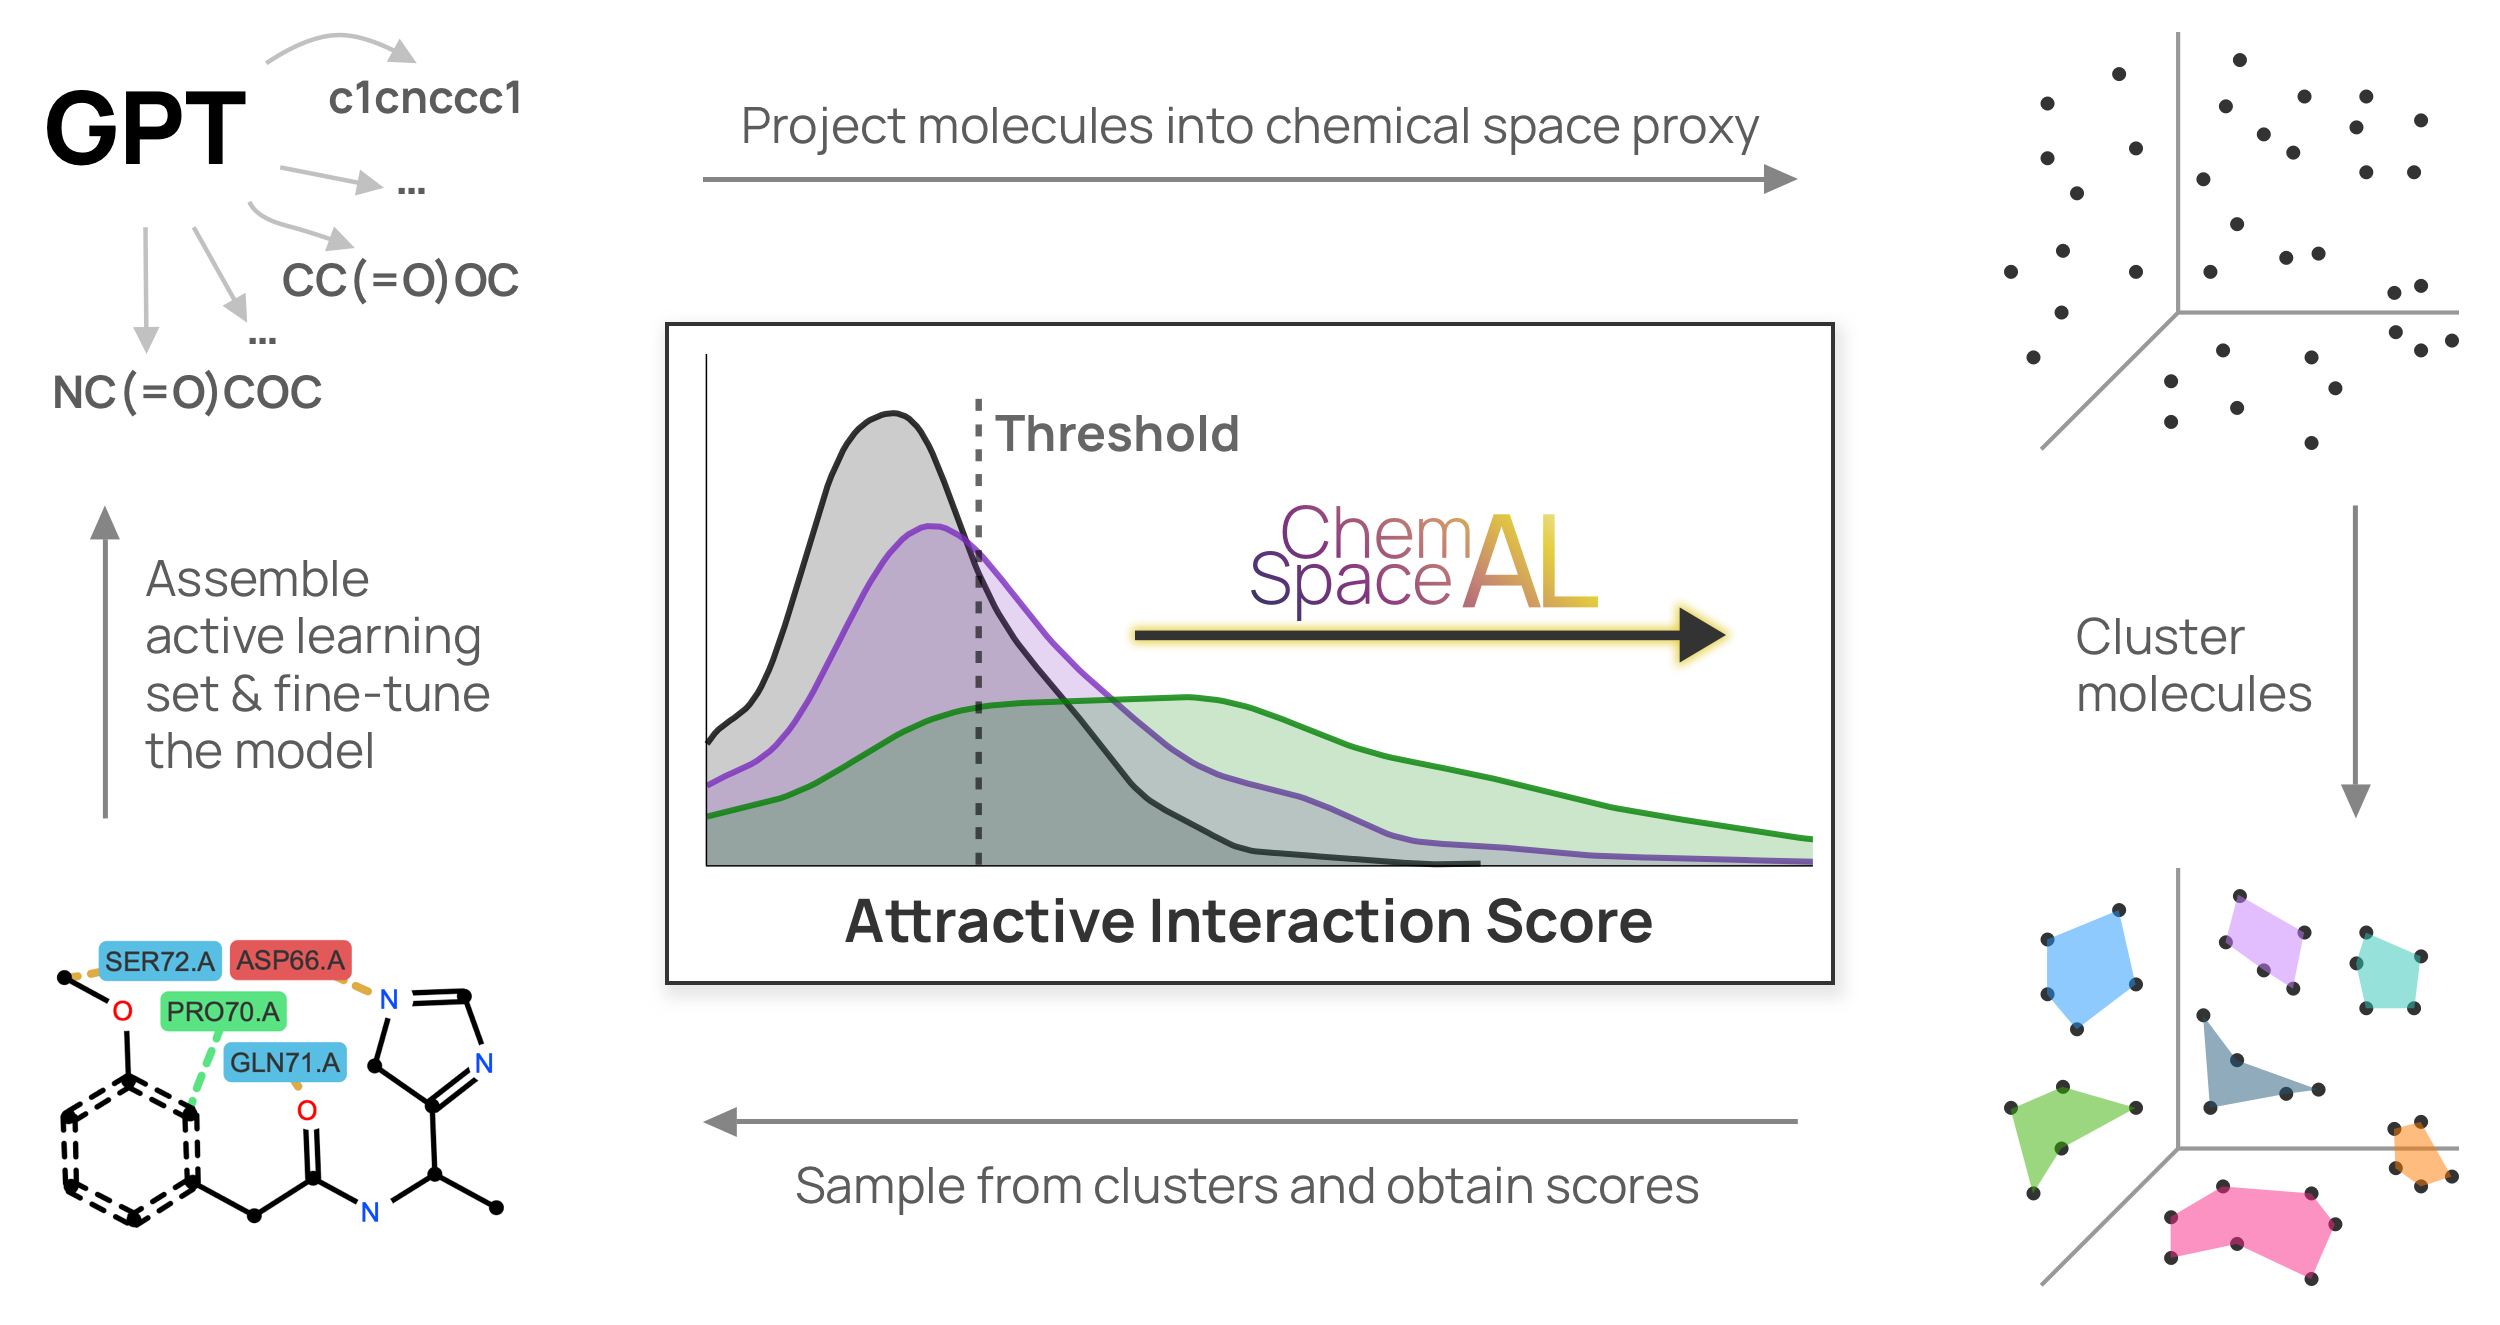

This Colab notebook allows you to easily implement [ChemSpaceAL v1.0.3](https://github.com/gregory-kyro/ChemSpaceAL/tree/main). For more details, check out the associated [open-access article](https://pubmed.ncbi.nlm.nih.gov/37744464/).

Please feel free to reach out via email with any questions or concerns:

**gregory.kyro@yale.edu** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **anton.morgunov@yale.edu**&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **rafi.brent@yale.edu**

## Set up notebook to run ChemSpaceAL

In [1]:
%%capture

#@title Set Up Notebook
#@markdown Press the *Play* button on the left to set up this notebook.
#@markdown to run ChemSpaceAL.

# !pip install ChemSpaceAL

# !git clone https://github.com/Liuhong99/Sophia.git

from ChemSpaceAL.Model import *
from ChemSpaceAL.Training import *
from ChemSpaceAL.Generation import *
from ChemSpaceAL.SamplingForDocking import *
from ChemSpaceAL.Scoring import *
from ChemSpaceAL.CreateSetForAL import *

In [2]:
%%capture

#@title Get Files
#@markdown Press the *Play* button on the left to get the necessary files.

# import requests

# base_url = 'https://github.com/gregory-kyro/ChemSpaceAL/raw/main/files/'

# files = ['training.csv.gz', 'validation.csv.gz', 'training_descriptors.yaml', 'fully_trained_model_parameters.pt', 'pca.pkl', 'protein.pdb']

# for file in files:
#     response = requests.get(base_url + file)
#     with open(file, 'wb') as f:
#         f.write(response.content)

## Training

In [ ]:
%%capture

#@title Pretraining Configuration
#@markdown Enter the paths to the training data, validation data, calculated
#@markdown descriptors, and save name for the model parameters, and then press
#@markdown the *Play* button on the left.

#@markdown **This will run with the files that we provide if left unchanged**
mode = 'Pretraining' #@param ["Pretraining", "Active Learning"] {type:"string"}
training_data = '/content/training.csv.gz'  #@param {type:'string'}

config = Config(mode=mode).config_dict
if mode == 'Pretraining':
  config['train_path'] = training_data
else:
   config['AL_training_path'] = training_data

config['descriptors_path'] = '/content/training_descriptors.yaml'
config['pretraining_checkpoint_path'] = '/content/pretraining_model_parameters.pt' if mode == 'Pretraining' else '/content/AL_model_parameters.pt'


In [ ]:
#@title Perform Pretraining
#@markdown Press the *Play* button on the left to pretrain the model.

print('Preprocessing training and validation data...')
train_dataset, val_dataset = load_data(config)
print('Training and validation data has been preprocessed.')

print('Training model...')
model = train_GPT(training_dataset = train_dataset, config_dict = config)

## Generation

In [8]:
%%capture

#@title Generation Configuration

#@markdown **This will run with the files that we provide if left unchanged**

descriptors = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/training_descriptors.yaml'  #@param {type:'string'}
model_parameters = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/fully_trained_model_parameters.pt'  #@param {type:'string'}
generation_size = 100  #@param {type:'integer'}
previous_scored_molecules = ''  #@param {type:"string"}
previous_scored_molecules_list = [path.strip() for path in previous_scored_molecules.split(",")]
previous_scored_molecules_list = [] if previous_scored_molecules_list == [''] else previous_scored_molecules_list
previous_AL_sets = ''  #@param {type:"string"}
previous_AL_sets_list = [path.strip() for path in previous_AL_sets.split(",")]
previous_AL_sets_list = [] if previous_AL_sets_list == [''] else previous_AL_sets_list
training_data = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/training.csv.gz'  #@param {type:'string'}

config = Config(mode=mode).config_dict

config['path_to_completions'] = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/completions.csv'
config['path_to_predicted'] = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/predicted.csv'
config['path_to_predicted_filtered'] = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/generated_molecules.csv'
config['diffdock_scored_path_list'] = previous_scored_molecules_list
config['al_trainsets_path_list'] = previous_AL_sets_list
config['path_to_metrics'] = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files/generation_metrics.txt'
config['generation_path'] = 'C:/Users/Gregory/Desktop/ChemSpaceAL/files'
config['pretraining_checkpoint_path'] = model_parameters
config['al_checkpoint_path'] = model_parameters
config['gen_size'] = generation_size
config['descriptors_path'] = descriptors
config['train_path'] = training_data

In [9]:
#@title Perform Generation
#@markdown Press the *Play* button on the left to generate molecules.

print('Generating molecules...')
generate_SMILES(config_dict=config)

Generating molecules...


[09:26:42] SMILES Parse Error: unclosed ring for input: 'O=[N+]([O-])c1ccc(N2N=C(c3ccc([N+](=O)[O-])cc3[N+](=O)[O-])/C(=N\Nc3ccc([N+](=O)[O-])cc3[N+](=O)[O-])C2c2cn(-c3ccc([N+](=O)[O-])cc3[N+](=O)[O-])nc2-c2ccc([N+](=O)[O-])cc2)c([N+](=O)[O-])c'
[09:26:42] SMILES Parse Error: extra open parentheses for input: 'O=C(NS(=O)(=O)N(Cc1ccc(N2N=C(c3ccc([N+](=O)[O-])cc3)/C(=C\c3cccc([N+](=O)[O-])c3)C2c2ccc([N+](=O)[O-])cc2)cc1)c1ccc(N2CCN(Cc3ccccc3-c3ccc(Cl)cc3)CC2)cc1'
[09:27:08] SMILES Parse Error: unclosed ring for input: 'O=C(OC[C@H]1O[C@H](Oc2c(-c3ccc(O)c(O)c3)oc3cc(O)cc(O)c3c2=O)[C@@H](OC(=O)N(c2ccc(O)c(O)c2)c2ccc(O)c(O)c2)[C@@H](O)[C@@H]1O)[C@@H]1[C@H](c2ccc(O)c(O)c2)C(=O)O[C@@H]1c1ccc2'
[09:27:08] SMILES Parse Error: unclosed ring for input: 'C[C@@]1(COC(=O)CCC(=O)OCCCCCCCCCOC(=O)CCCC[C@@H]2SC[C@@H]3NC(=O)N[C@H]23)CCC[C@@]2(C)[C@@H]3CC[C@@H]4[C@@]5(C)CC[C@H](OC(=O)CCCCCCCCC(=O)O)C(C)(C)[C@@H]5CC[C@@]45CC[C@@]3(C)CC[C@@H]12'
[09:27:35] Conflicting single bond directions around double bon

## Projecting into chemical space and sampling for docking

In [ ]:
%%capture

#@title Sampling for Docking Configuration

#@markdown **This will run with the files that we provide if left unchanged**

mode = 'Pretraining' #@param ["Pretraining", "Active Learning"] {type:"string"}
descriptors = '/content/training_descriptors.yaml'  #@param {type:'string'}

config = Config(mode=mode).config_dict
if mode == 'Pretraining':
  config['train_path'] = training_data
else:
   config['AL_training_path'] = training_data

config['path_to_predicted'] = '/content/predicted.csv'
config['diffdock_scored_path_list'] = previous_scored_molecules_list
config['diffdock_save_path'] = '/content/diffdock.pkl'
config['samples_save_path'] = '/content/samples.pkl'
config['clusters_save_path'] = '/content/clusters.pkl'
config['kmeans_save_path'] = '/content/kmeans.pkl'
config['path_to_pca'] = '/content/pca.pkl'
config['path_to_gen_mol_descriptors'] = '/content/generated_molecules_descriptors.csv'
config['descriptors_path'] = descriptors

In [ ]:
%%capture

#@title Project Molecules into Chemical Space and Sample for Docking

#@markdown Press the *Play* button on the left to calculate descriptors,
#@markdown project the molecules into the chemical space proxy, cluster the
#@markdown molecules, and sample from the clusters for docking.

descriptors = get_descriptors(config)
pca_transformed = project_into_pca_space(config)
cluster_and_sample(mols=pca_transformed, config=config, n_clusters=100, n_samples=5)

In [3]:
%%capture

#@title Set up notebook

#@markdown Press the *Play* button on the left to set up the notebook to run
#@markdown Diffdock on the sampled molecules

# Import necessary packages and modules
import torch
import os
from rdkit import Chem
import shutil
import pandas as pd
from tqdm import tqdm

# Install necessary packages if they are not present
try:
    import biopandas
except:
    !pip install pyg==0.7.1 --quiet
    !pip install pyyaml==6.0 --quiet
    !pip install scipy==1.7.3 --quiet
    !pip install networkx==2.6.3 --quiet
    !pip install biopython==1.79 --quiet
    !pip install rdkit-pypi==2022.03.5 --quiet
    !pip install e3nn==0.5.0 --quiet
    !pip install spyrmsd==0.5.2 --quiet
    !pip install pandas==1.5.3 --quiet
    !pip install biopandas==0.4.1 --quiet


# Install PyTorch geometric dependencies if not already present
try:
    import torch_geometric
except ModuleNotFoundError:
    !pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster --y
    !pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html --quiet
    !pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html --quiet
    !pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html --quiet
    !pip install git+https://github.com/pyg-team/pytorch_geometric.git --quiet


# Clone DiffDock repository if not already present
if not os.path.exists("DiffDock"):
    !git clone https://github.com/gcorso/DiffDock.git
    os.chdir('/DiffDock')
    # Use a specific version for consistency
    !git checkout a6c5275


# Clone ESM repository inside DiffDock if not already present
if not os.path.exists("/DiffDock/esm"):
    os.chdir('DiffDock')
    !git clone https://github.com/facebookresearch/esm
    os.chdir('/DiffDock/esm')
    # Use a specific version for consistency
    !git checkout ca8a710
    # Install ESM
    !sudo pip install -e .
    os.chdir('/DiffDock')

FileNotFoundError: [WinError 2] The system cannot find the file specified: '/DiffDock'

In [10]:
!git clone https://github.com/facebookresearch/esm

Cloning into 'esm'...


In [12]:

!git checkout ca8a710
# Install ESM
!sudo pip install -e .
os.chdir('/DiffDock')

FileNotFoundError: [WinError 2] The system cannot find the file specified: '/esm'

In [24]:
cd C:\Users\Gregory\Desktop\ChemSpaceAL\

C:\Users\Gregory\Desktop\ChemSpaceAL


In [23]:
!sudo pip install -e .


'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%%capture

#@title Docking Configuration

#@markdown **This will run with the files that we provide if left unchanged**

protein_path = '/content/protein.pdb'  #@param {type:'string'}
diffdock_save_path = '/content/diffdock.pkl'

# Ensure the directory for DiffDock results exists, if not, create it
DIFFDOCK_RESULTS_PATH = "/content/Diffdock_poses"
if not os.path.exists(DIFFDOCK_RESULTS_PATH):
    os.mkdir(DIFFDOCK_RESULTS_PATH)

# Make sure the results directory exists
assert os.path.exists(DIFFDOCK_RESULTS_PATH), f"Directory {DIFFDOCK_RESULTS_PATH} doesn't exist!"

In [ ]:
%%capture

#@title Define necessary functions

def load_scored_mols(scored_path_list):
    """
    Load the scores of molecules from given CSV paths.

    Args:
    - scored_path_list (list): List of paths to CSV files containing molecular scores.

    Returns:
    - dict: Dictionary with molecule smiles as keys and their corresponding scores as values.
    """
    scored_mols = {}
    for scored_path in scored_path_list:
        for _, row in pd.read_csv(scored_path).iterrows():
            if row['smiles'] in scored_mols and scored_mols[row['smiles']] != row['score']:
                print(f"{row['smiles']} scored {row['score']} but was already scored {scored_mols[row['smiles']]}")
            scored_mols[row['smiles']] = row['score']
    return scored_mols

def count_new_samples(sampled_path, scored_set):
    """
    Count and display the number of sampled molecules that were previously scored.

    Args:
    - sampled_path (str): Path to the CSV file containing sampled molecules.
    - scored_set (set): Set of previously scored molecule smiles.
    """
    sampled_mols = set(pd.read_csv(sampled_path)['smiles'])
    repeated = len(sampled_mols & scored_set)
    print(f"scored directory contains {len(scored_set)} unique molecules")
    print(f"{repeated} out of {len(sampled_mols)} sampled molecules were already scored")

def get_top_poses(ligands_csv, protein_pdb_path, scored_set):
    """
    Process ligands, generate embeddings, and run the DiffDock inference.

    Args:
    - ligands_csv (str): Path to the CSV file containing ligands.
    - protein_pdb_path (str): Path to the protein structure file.
    - scored_set (set): Set of previously scored molecule smiles.

    Returns:
    - list: List of paths to ligand files.
    """
    data = pd.read_csv(ligands_csv)
    ligand_files = []

    os.environ['HOME'] = 'esm/model_weights'
    os.environ['PYTHONPATH'] = f'{os.environ.get("PYTHONPATH", "")}:/content/DiffDock/esm'

    pbar = tqdm(range(len(data)), total=len(data))
    for i in pbar:
        smiles = data['smiles'][i]
        if smiles in scored_set:
            continue
        rdkit_mol = Chem.MolFromSmiles(smiles)

        if rdkit_mol is not None:
            # Prepare input data for ESM
            with open('/content/input_protein_ligand.csv', 'w') as out:
                out.write('protein_path,ligand\n')
                out.write(f'{protein_pdb_path},{smiles}\n')

            # Remove previous results
            shutil.rmtree('/content/DiffDock/results', ignore_errors=True)

            # Generate ESM embeddings
            os.chdir('/content/DiffDock')
            !python /content/DiffDock/datasets/esm_embedding_preparation.py --protein_ligand_csv /content/input_protein_ligand.csv --out_file /content/DiffDock/data/prepared_for_esm.fasta
            !python /content/DiffDock/esm/scripts/extract.py esm2_t33_650M_UR50D /content/DiffDock/data/prepared_for_esm.fasta /content/DiffDock/data/esm2_output --repr_layers 33 --include per_tok --truncation_seq_length 30000

            # Run DiffDock inference
            !python /content/DiffDock/inference.py --protein_ligand_csv /content/input_protein_ligand.csv --out_dir /content/DiffDock/results/user_predictions_small --inference_steps 20 --samples_per_complex 10 --batch_size 6

            # Collect results
            for root, _, files in os.walk('/content/DiffDock/results/user_predictions_small'):
                for file in files:
                    if file.startswith('rank1_confidence'):
                        shutil.move(os.path.join(root, file), os.path.join(DIFFDOCK_RESULTS_PATH, f'complex{i}.sdf'))
                        ligand_files.append(f'{DIFFDOCK_RESULTS_PATH}complex{i}.sdf')
    return ligand_files

In [ ]:
#@title Run Diffdock

# Retrieve top poses for the molecules
top_diffdock_poses = get_top_poses(diffdock_save_path, protein_path, set())

## Score each protein-ligand complex

In [ ]:
%%capture

#@title Scoring Configuration

#@markdown **This will run with the files that we provide if left unchanged**

diffdock_poses = '/content/diffdock_poses/'  #@param {type:'string'}
protein_path = '/content/protein.pdb'  #@param {type:'string'}

config['diffdock_results_path'] = diffdock_poses
config['protein_path'] = protein_path
config['diffdock_samples_path'] = '/content/input_protein_ligand.csv'
config['path_to_scored'] = '/content/scored.csv'
config['path_to_good_mols'] = '/content/molecules_above_threshold.csv'

In [ ]:
#@title Score Molecules

#@markdown Press the *Play* button on the left to score each docking pose

ligand_scores = score_ligands(config)
parse_and_prepare_diffdock_data(ligand_scores, config)

## Create active learning set for fine-tuning

In [ ]:
%%capture

#@title Create Active Learning Set Configuration

#@markdown **This will run with the files that we provide if left unchanged**

config = Config().config_dict
config['AL_set_save_path'] = '/content/AL_training_set.csv'
config['path_to_scored'] = '/content/scored.csv'
config['samples_save_path'] = '/content/samples.pkl'
config['clusters_save_path'] = '/content/clusters.pkl'
config['path_to_good_mols'] = '/content/molecules_above_threshold.csv'

In [ ]:
#@title Create Active Learning Set for Fine-Tuning

#@markdown Press the *Play* button on the left to create the active learning set.

cluster_scores = compute_cluster_scores(config)
good_molecules_list = pd.read_csv(config['path_to_good_mols'])[config['smiles_key']].tolist()
training_sampled = sample_clusters_for_active_learning(cluster_scores, config)
combine_sampled_and_good_ligands(training_sampled, good_molecules, config)

# Additional runs

In [1]:
from extract_top_smiles import *

extract_top_10_smiles('C:/Users/Gregory/Desktop/ChemSpaceAL/files/scored_al5.csv', 
                      'C:/Users/Gregory/Desktop/ChemSpaceAL/files/top10_scored_al5.csv')

Saved the top 10 smiles with highest scores to C:/Users/Gregory/Desktop/ChemSpaceAL/files/top10_scored_al5.csv
